In [1]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon

import shapefile

import numpy as np
import matplotlib.pyplot as plt
import io
import cv2
import glob
import cv2

In [3]:
# define a function which returns an image as numpy array from figure




def draw_aari_icetype(file,save_path = None):
    fig = plt.figure(figsize=(9, 9))
    ax1 = fig.add_subplot(111)
    fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 
    # ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='i')
    m.drawmapboundary()
    

    shp_info = m.readshapefile(file,'aari_arc',drawbounds=False)
    colors = {8:'y',82: 'b',83:'blueviolet',86:'g',95:'brown'}

    for info, shp in zip(m.aari_arc_info, m.aari_arc):
        type_a = int(info['SA'])
        fast_ice = int(info['FA'])
        if type_a in colors.keys():
            poly = Polygon(shp, facecolor=colors[type_a], lw=0,ls=None)  
            ax1.add_patch(poly)
        if fast_ice in colors.keys():
            poly = Polygon(shp, facecolor=colors[fast_ice], lw=0,ls=None)  
            ax1.add_patch(poly)
    m.fillcontinents(color='white')
    if save_path:
        plt.savefig(save_path,dpi=180,bbox_inches='tight',pad_inches = 0, edgecolor = 'white')
#     plt.show()
    return fig

def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=180)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
    
def add_img_color(image_arr):
    new_aari_array = np.full(shape=(image_arr.shape[:2]),fill_value=0)
    for i in range(3):
        new_aari_array += image_arr[:,:,i]
    return new_aari_array

def recode_aari_mask(pic):
    pic[pic < 4] = 0
    pic[pic == 765] = 0 # no data
    pic[pic == 128] = 1 # FYI
    pic[pic == 249] = 2 # old ice
    pic[pic == 382] = 3 # fast ice
    pic[pic == 407] = 4 # young ice
    pic[pic>4] = 0
    return pic

In [48]:
aari_path = r'E:\\python_workfile\\sea_ice_classification\\data\\mask\\aari\\'
dir_path = r'H:\\remote_sensing_data\\sea_ice_type\\aari\\'
files = glob.glob(dir_path + '*.shp')

20190917
20190924
20191001
20191008
20191015
20191029
20191105
20191112
20191119
20191126
20191203
20191210
20191217
20191224
20191231
20200107
20200114
20200121
20200128
20200204


<ipython-input-47-c05f296ccb0d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(9, 9))


20200211
20200218
20200225
20200303
20200310
20200317
20200324
20200331
20200407
20200414
20200421
20200428
20200505
20200512
20200519
20200526
20200602
20200609
20200616
20200623
20200630
20200707
20200714
20200721
20200804
20200818
20200825
20200901
20200908
20200915
20200922
20200929
20201006
20201013
20201020
20201027
20201103
20201110
20201117
20201124
20201201
20201208
20201215
20201222
20210112
20210119
20210126
20210202
20210209
20210216
20210223
20210302
20210309
20210316
20210323
20210330
20210406
20210413


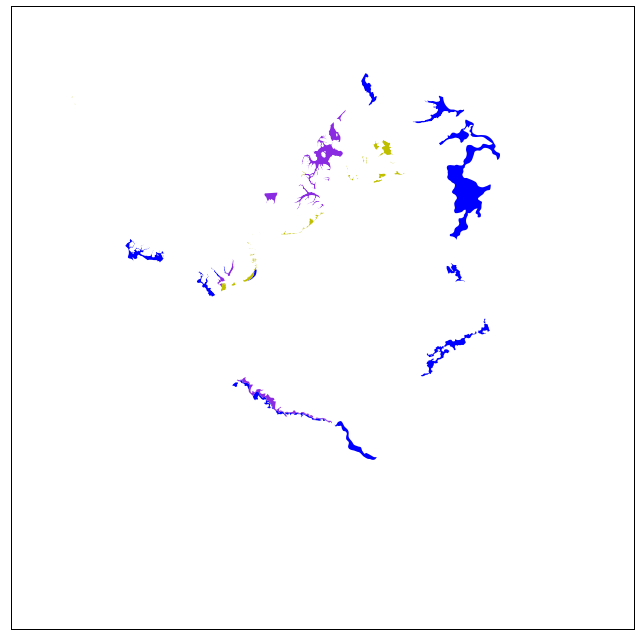

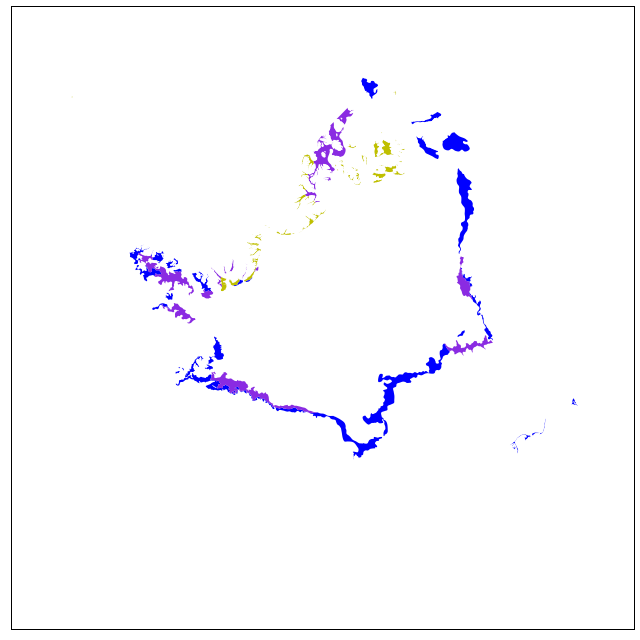

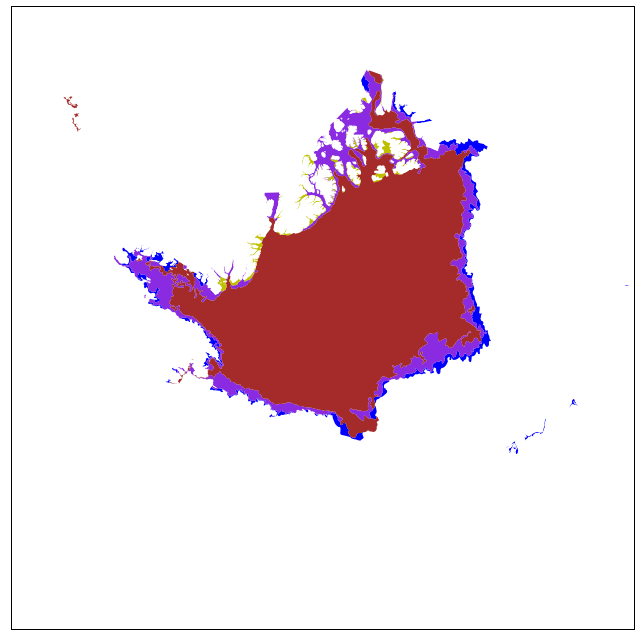

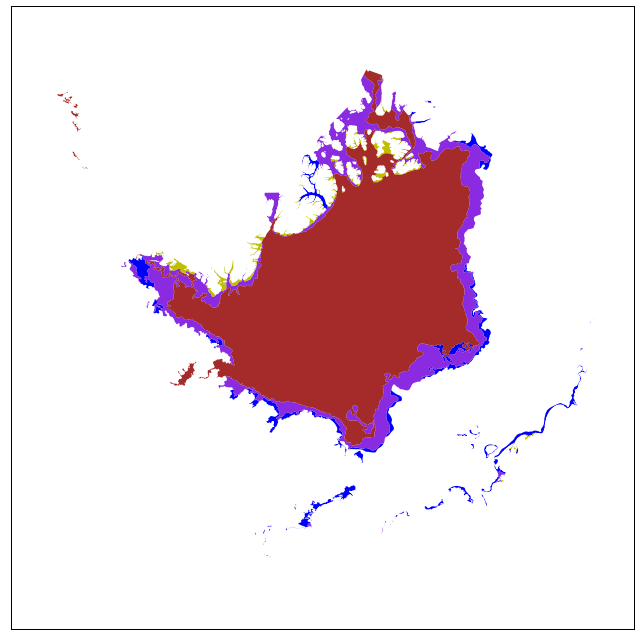

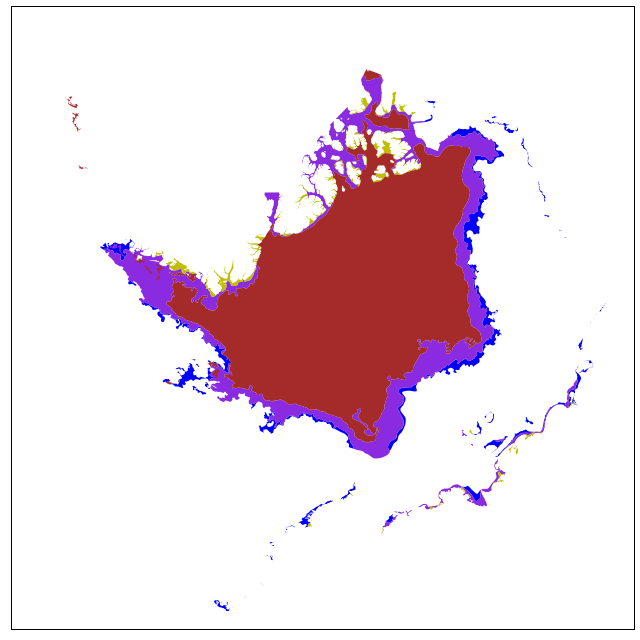

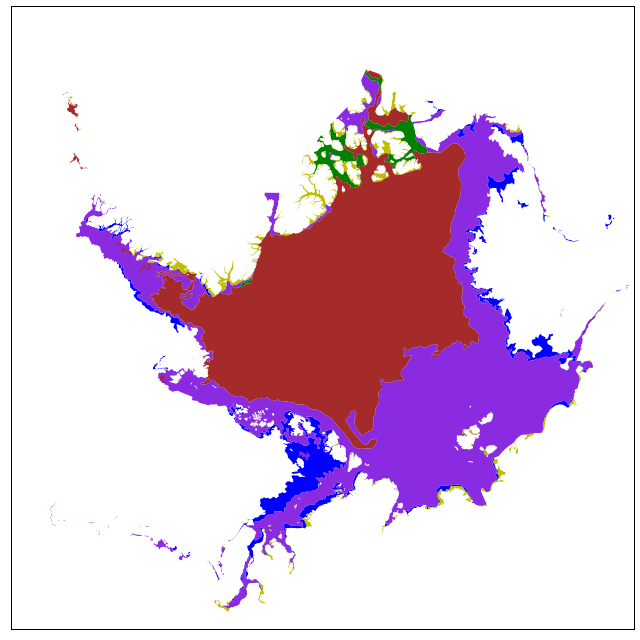

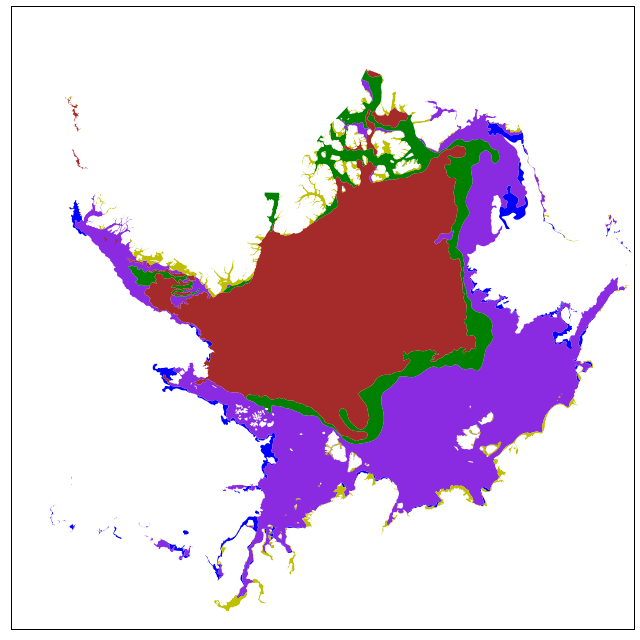

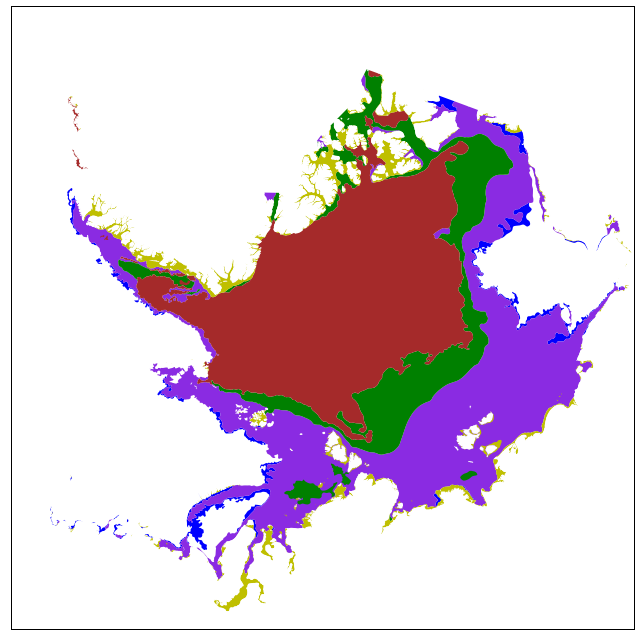

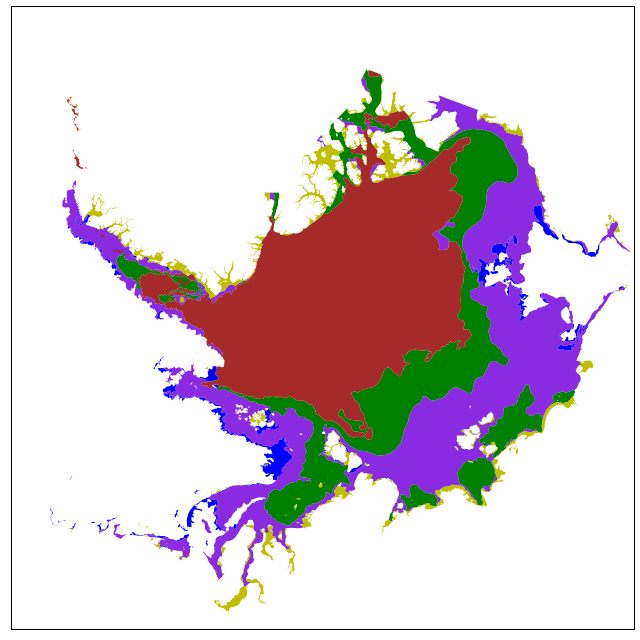

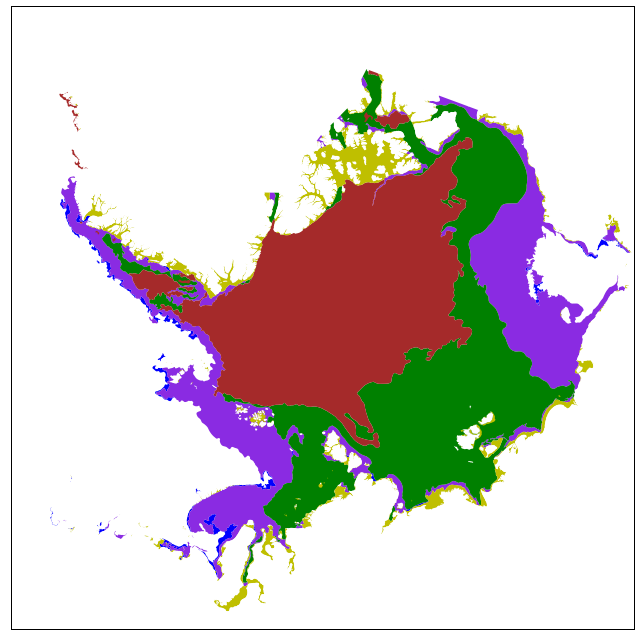

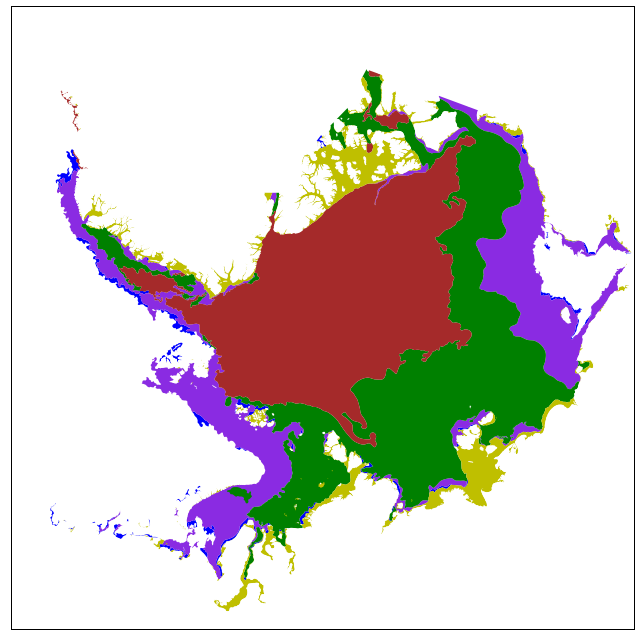

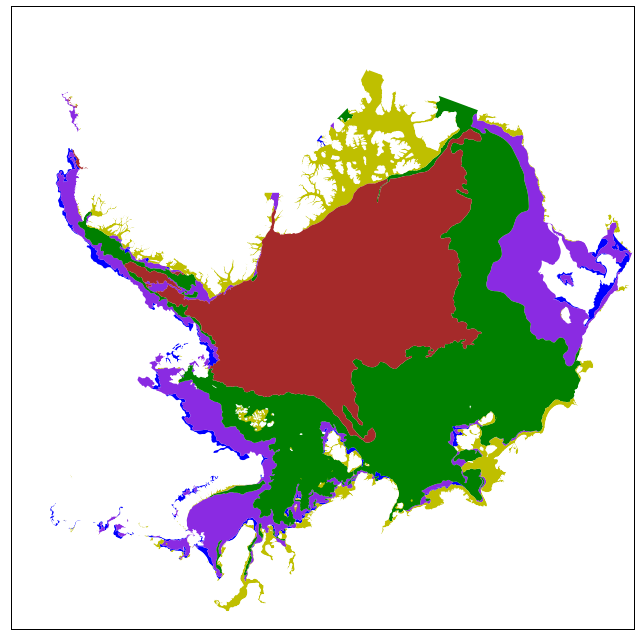

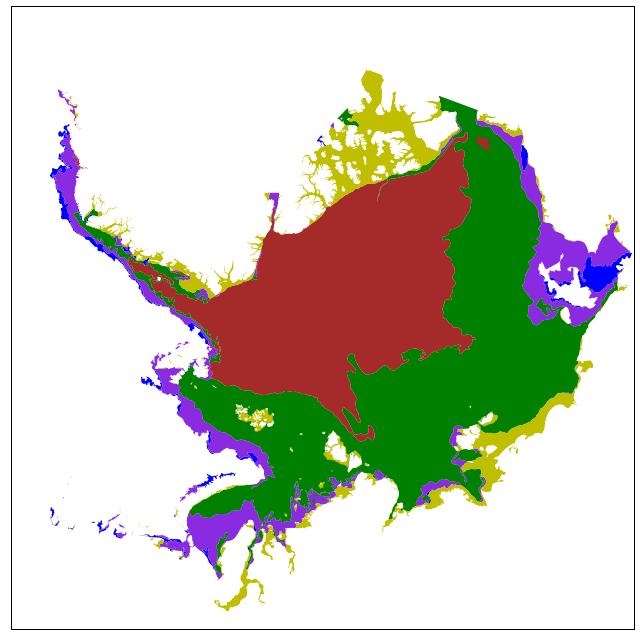

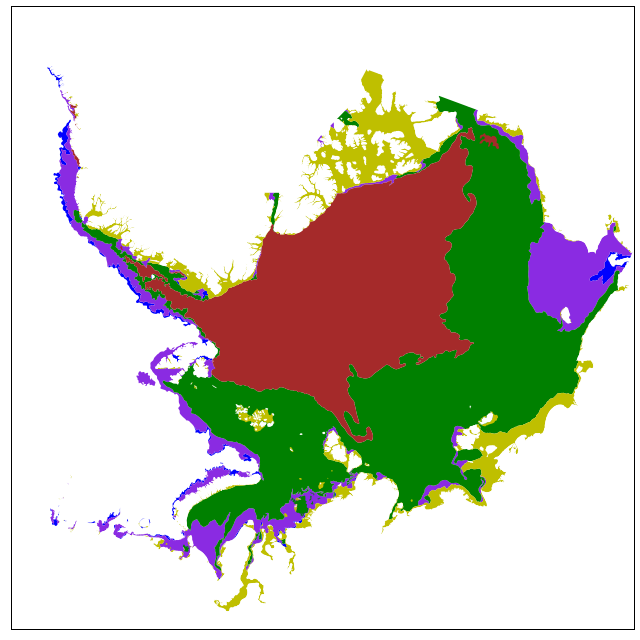

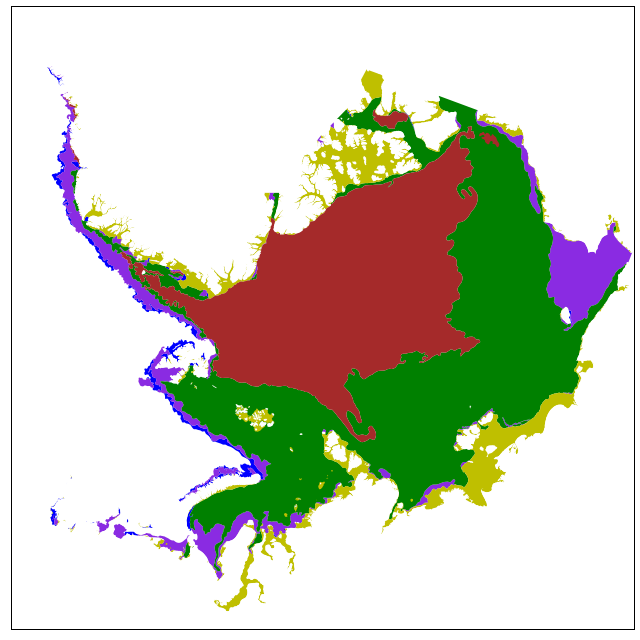

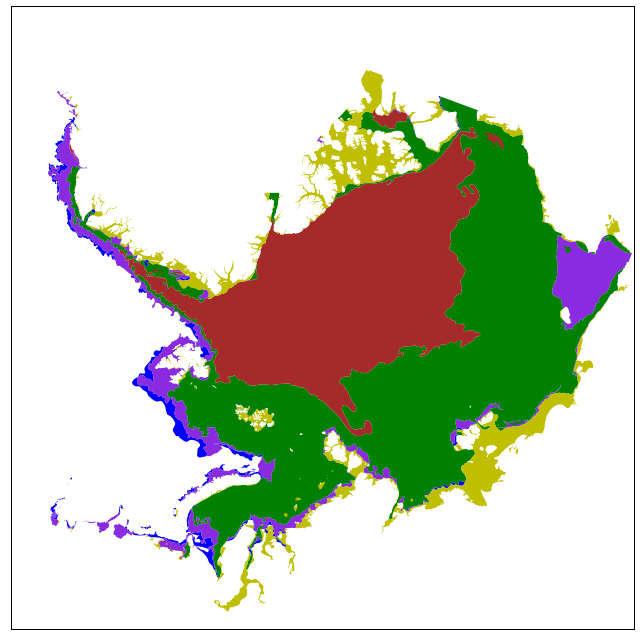

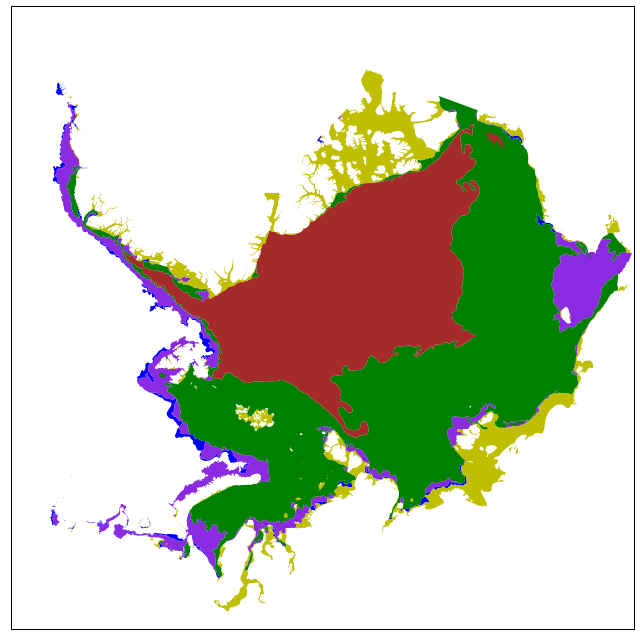

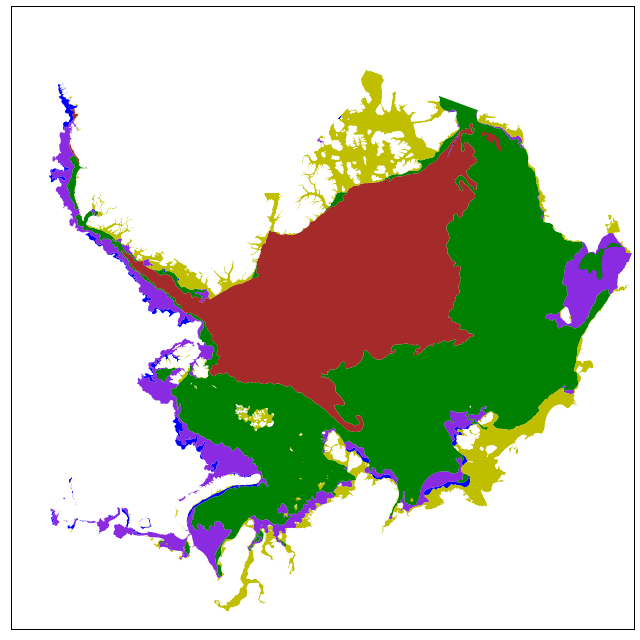

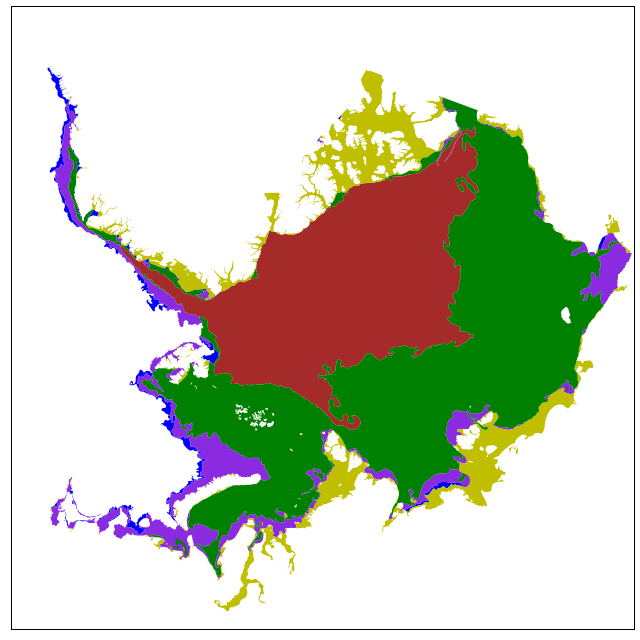

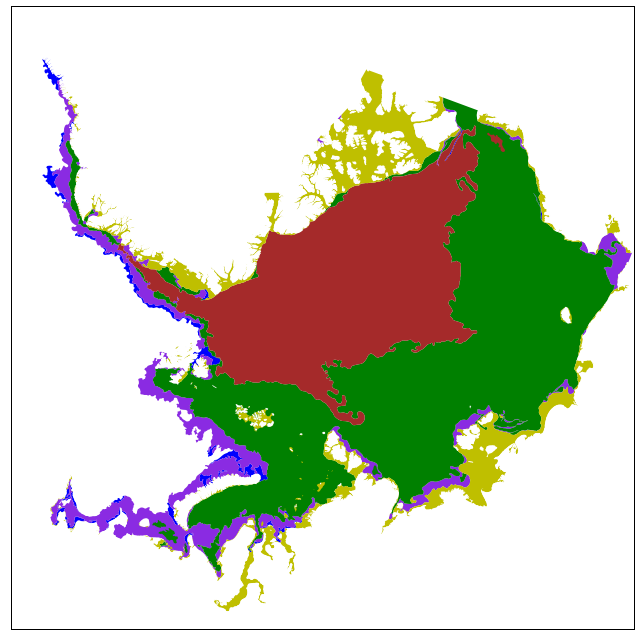

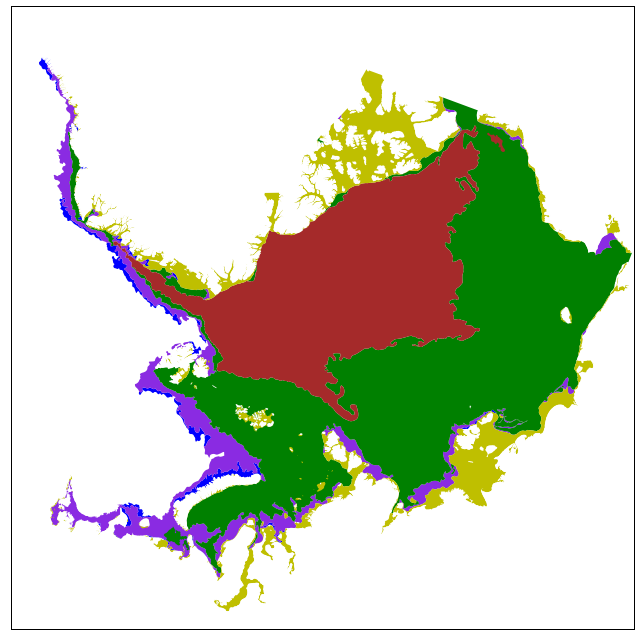

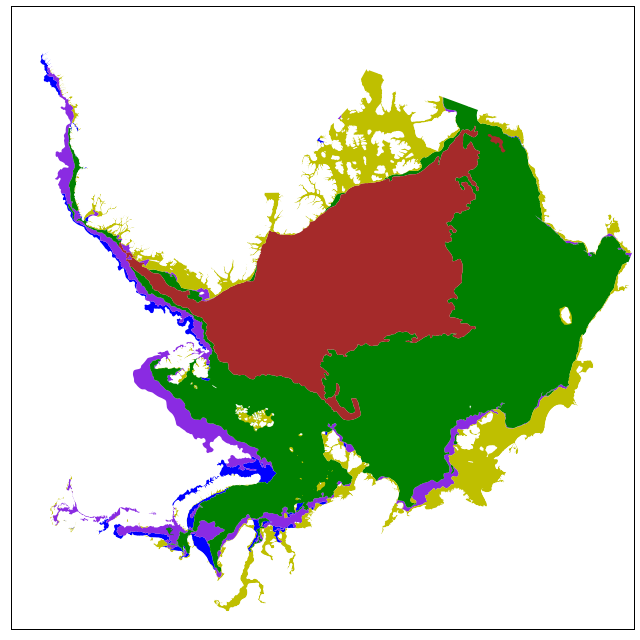

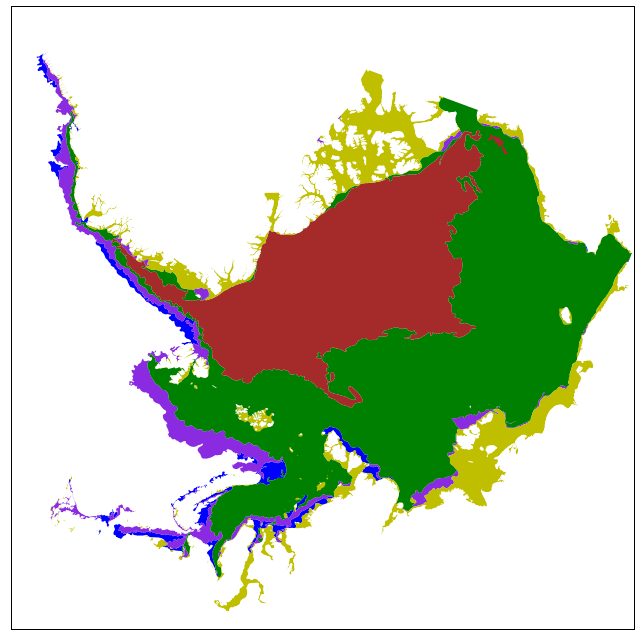

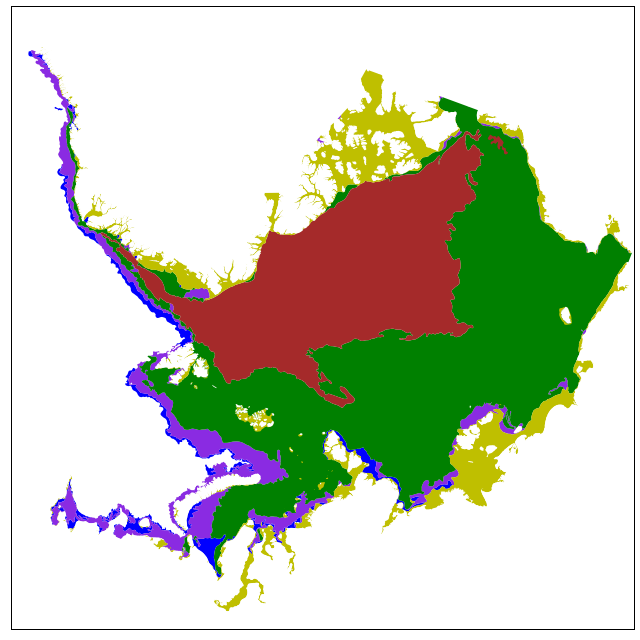

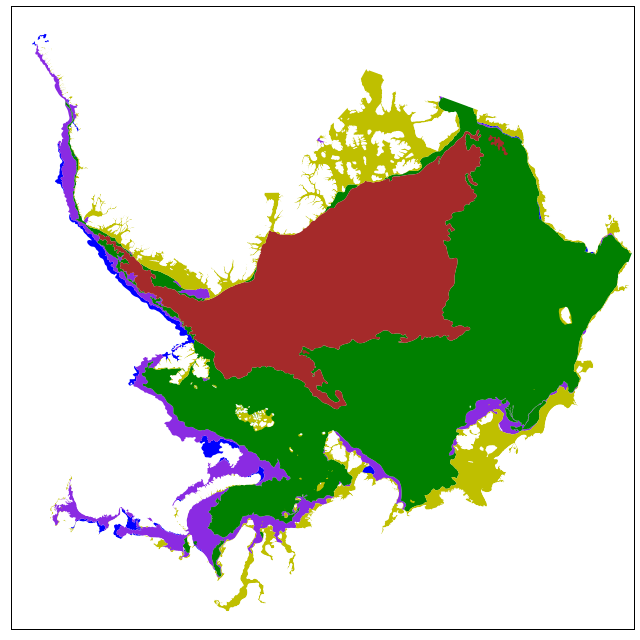

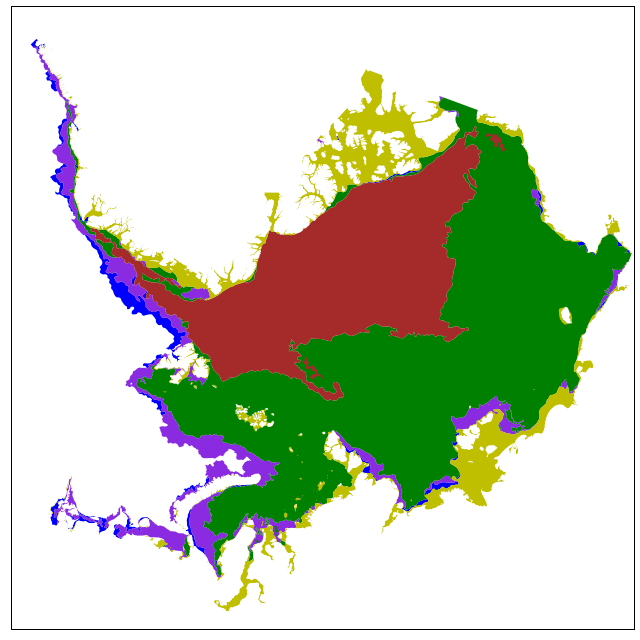

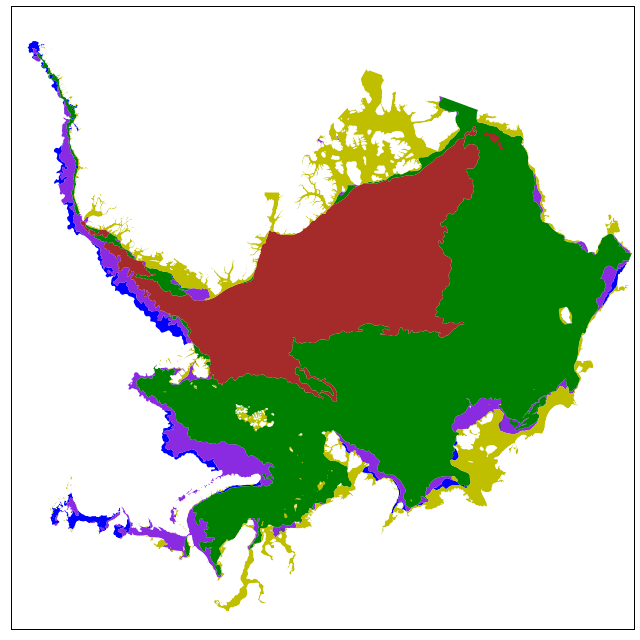

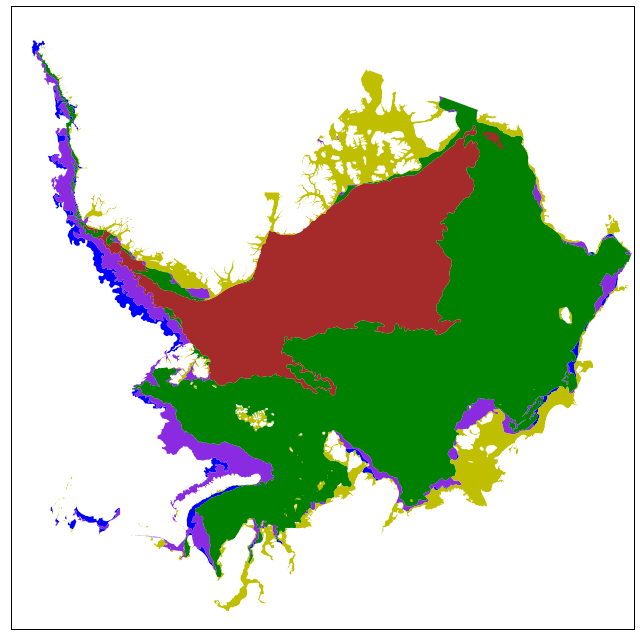

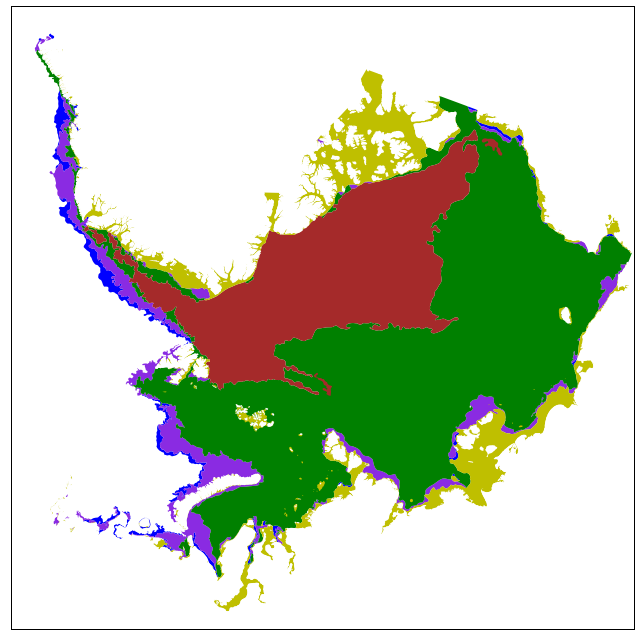

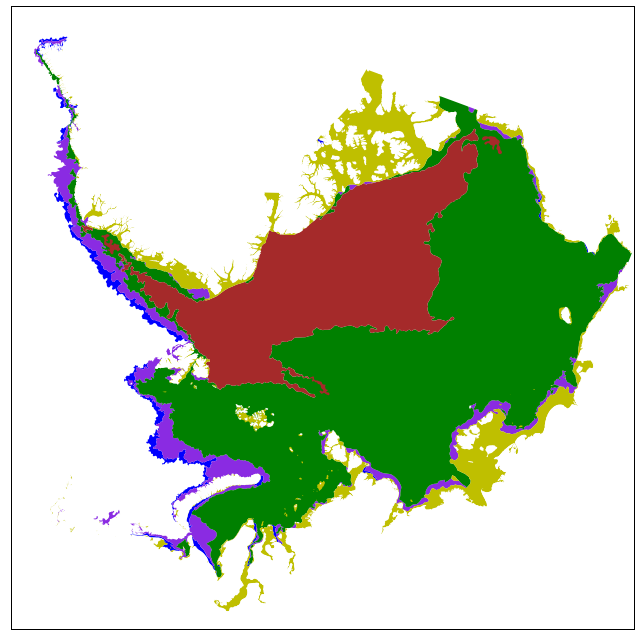

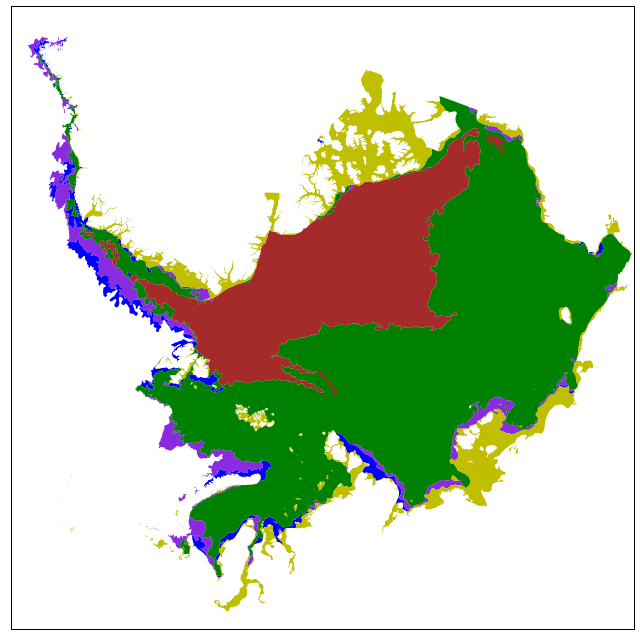

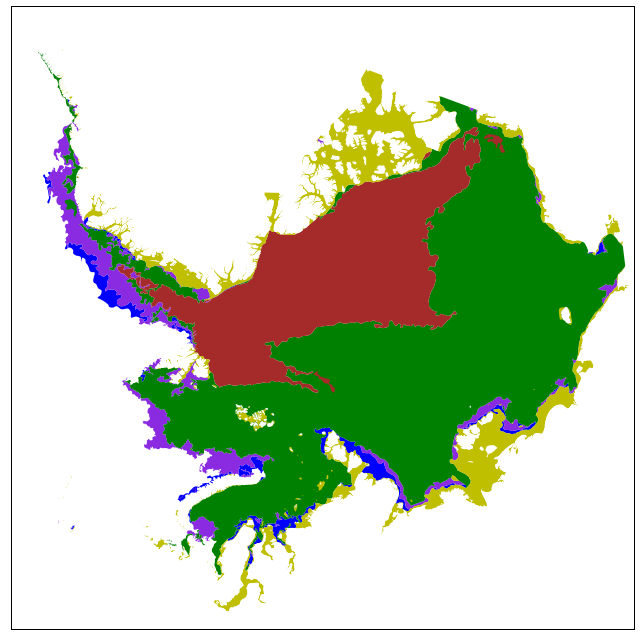

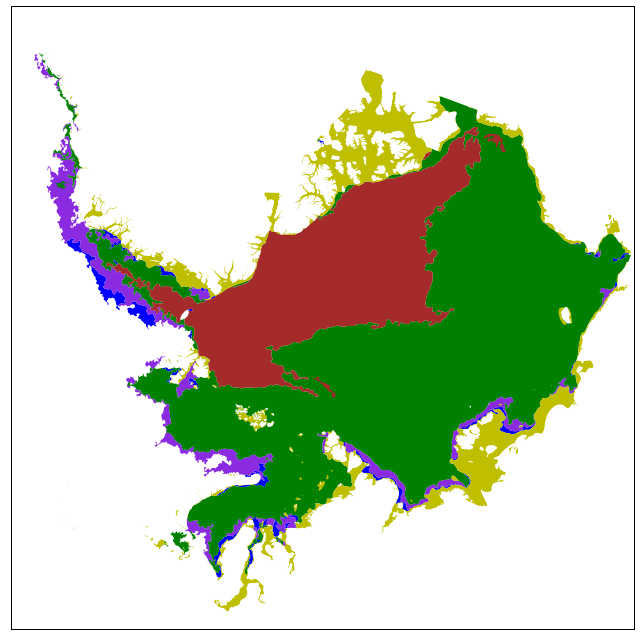

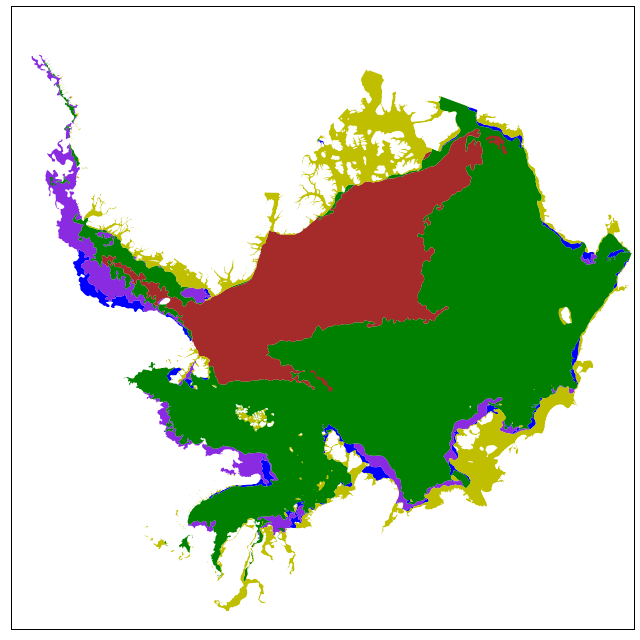

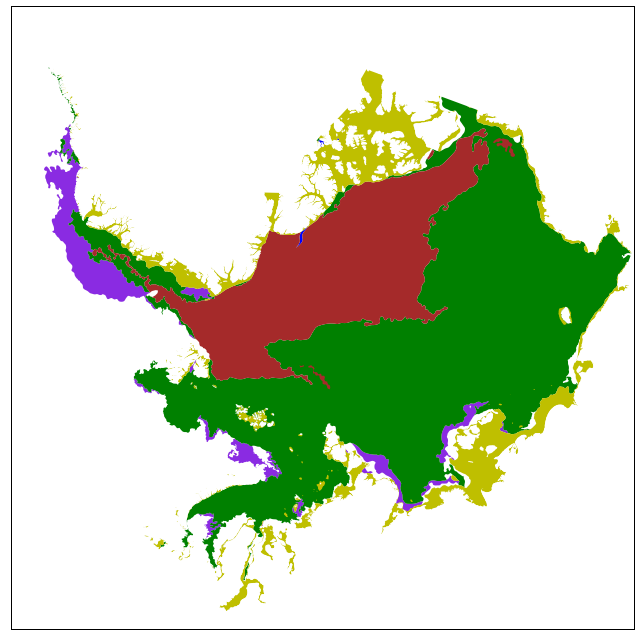

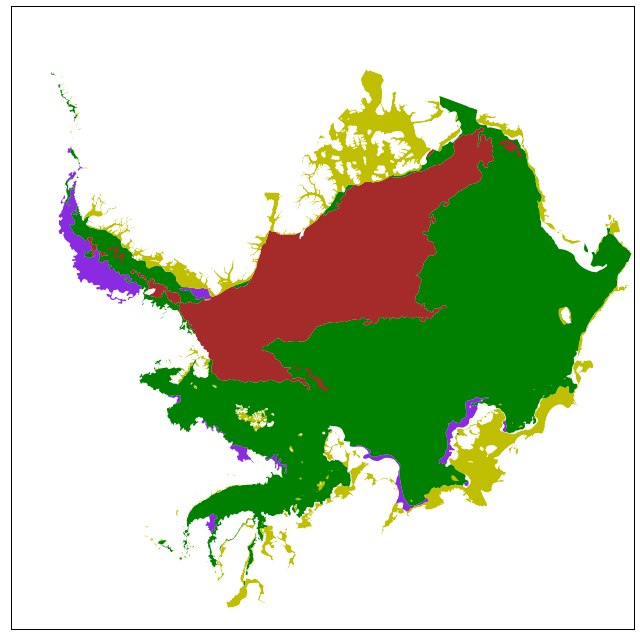

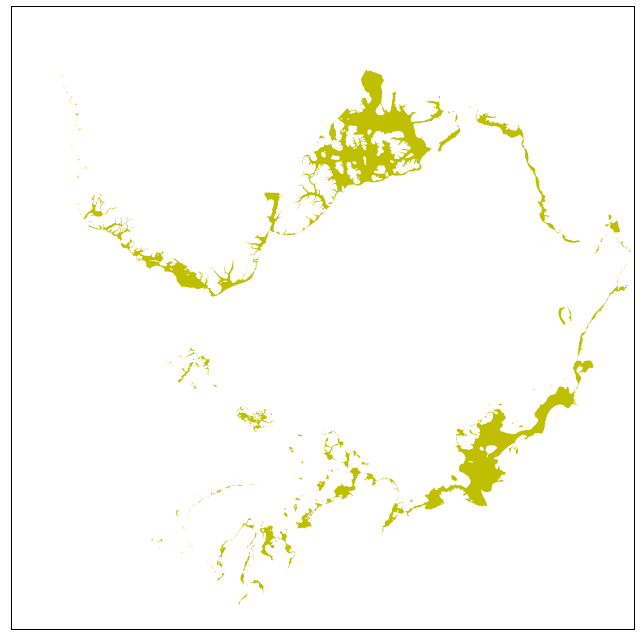

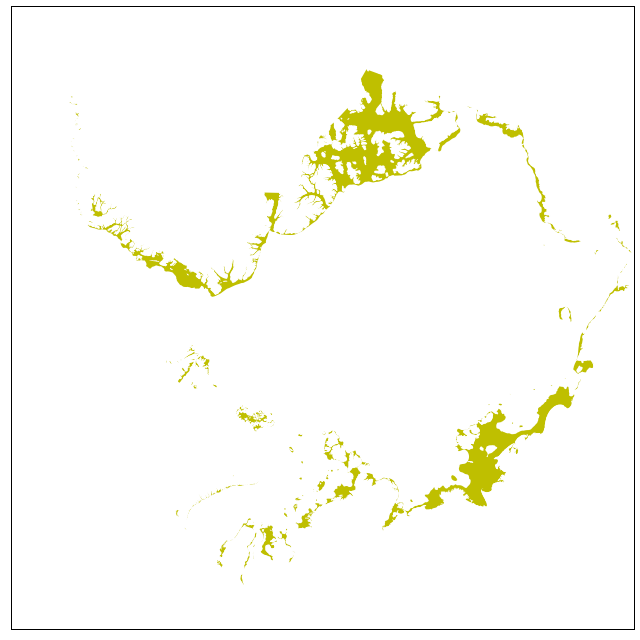

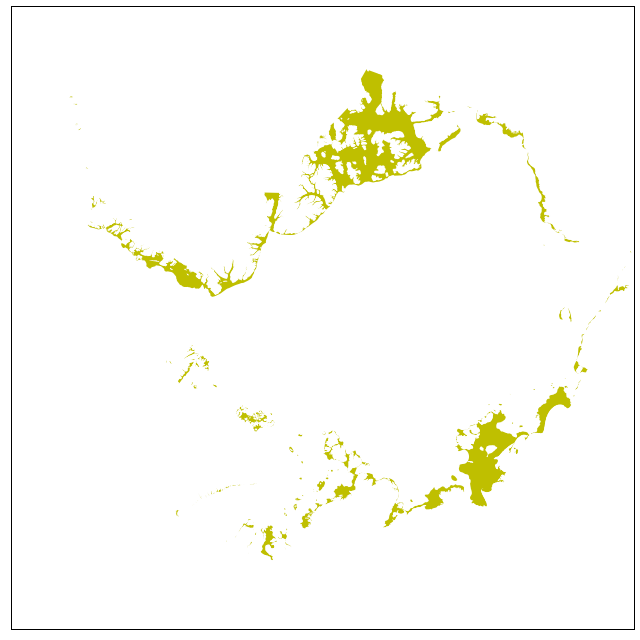

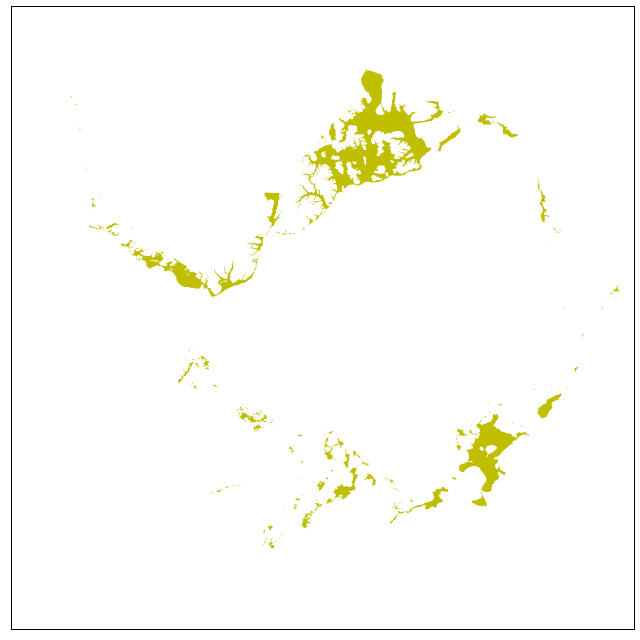

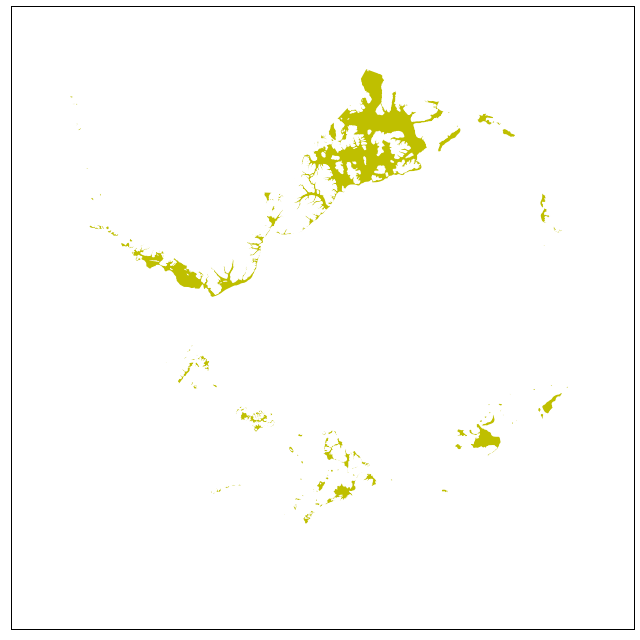

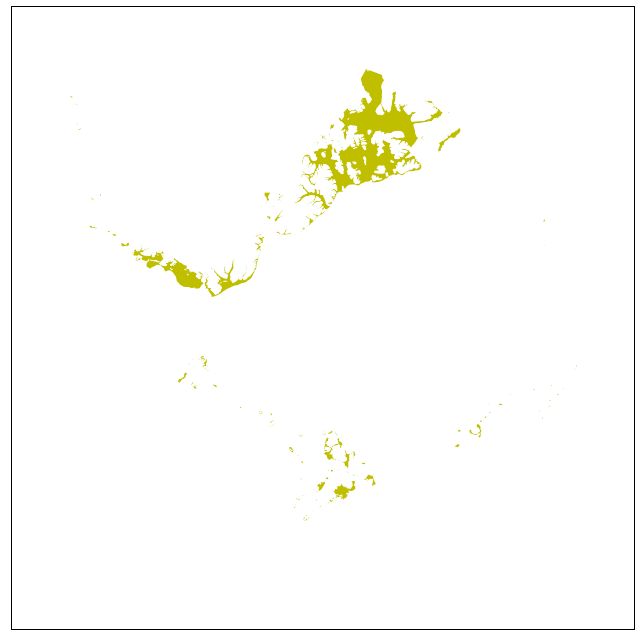

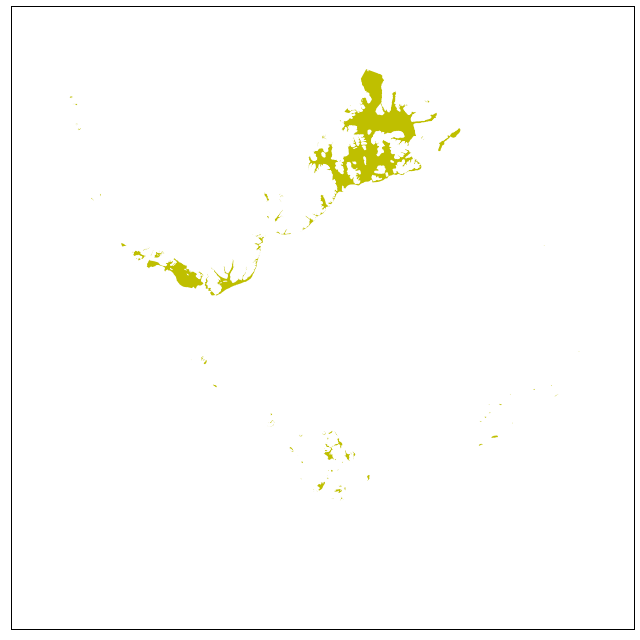

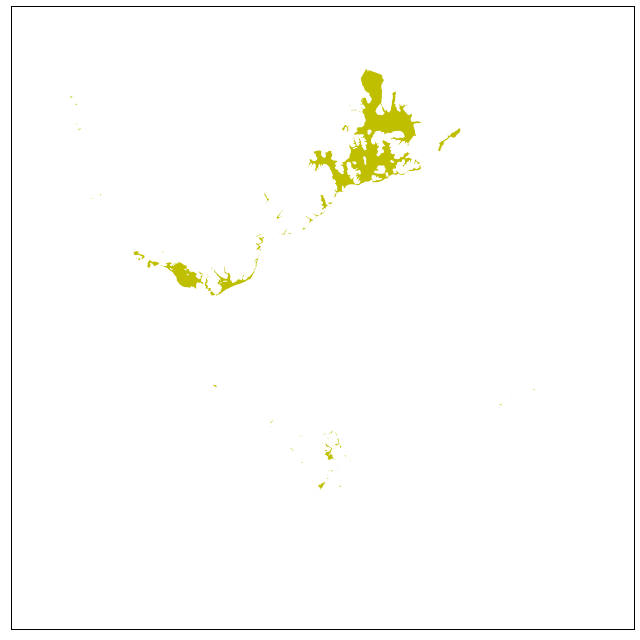

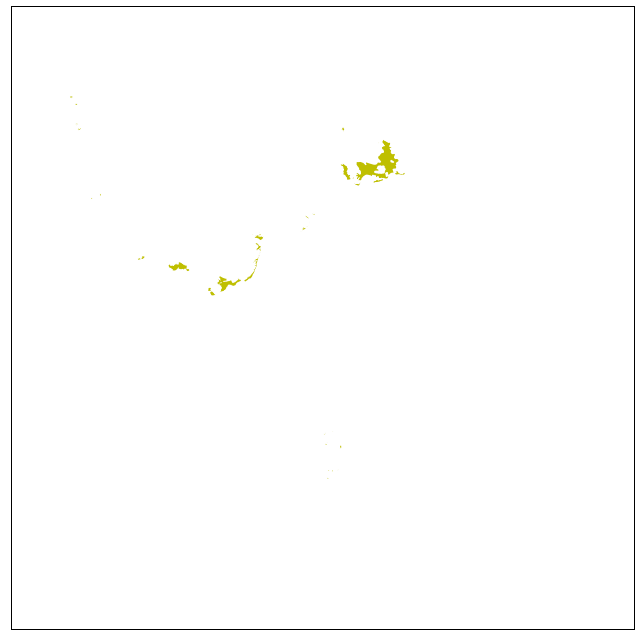

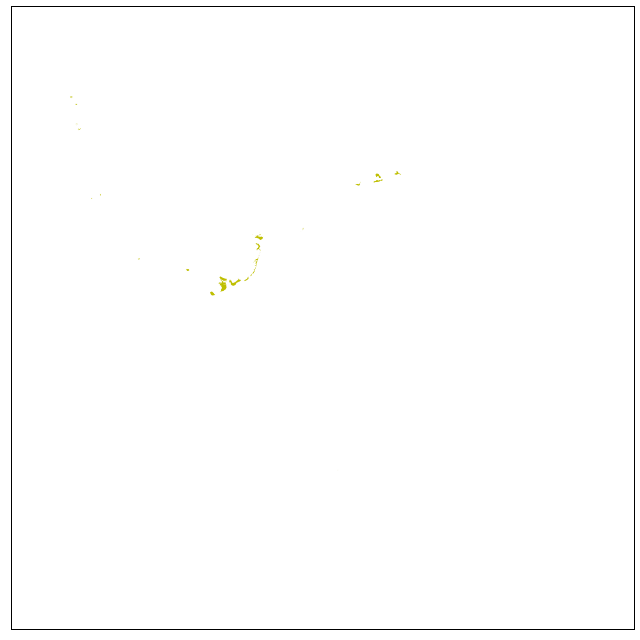

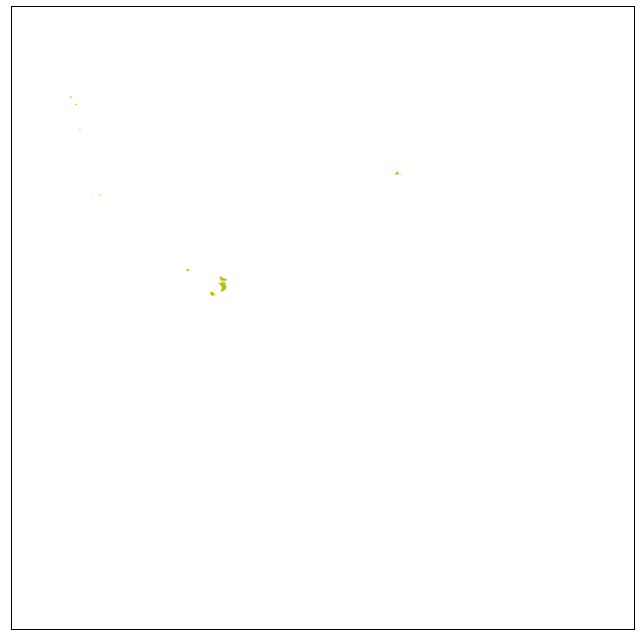

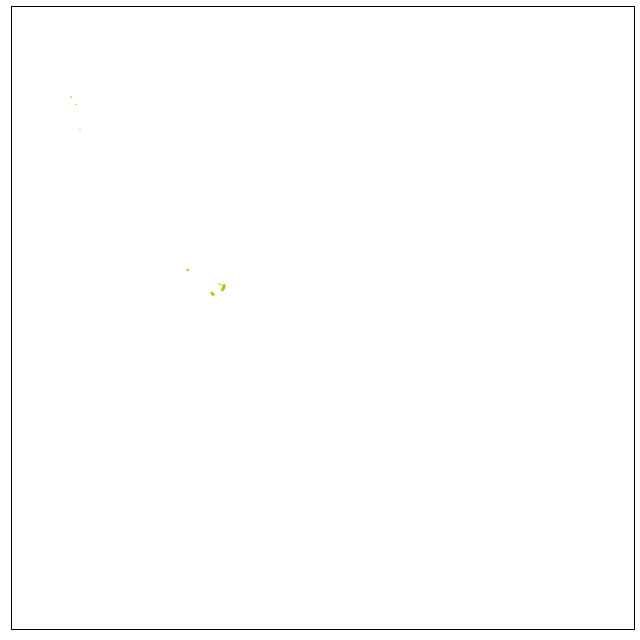

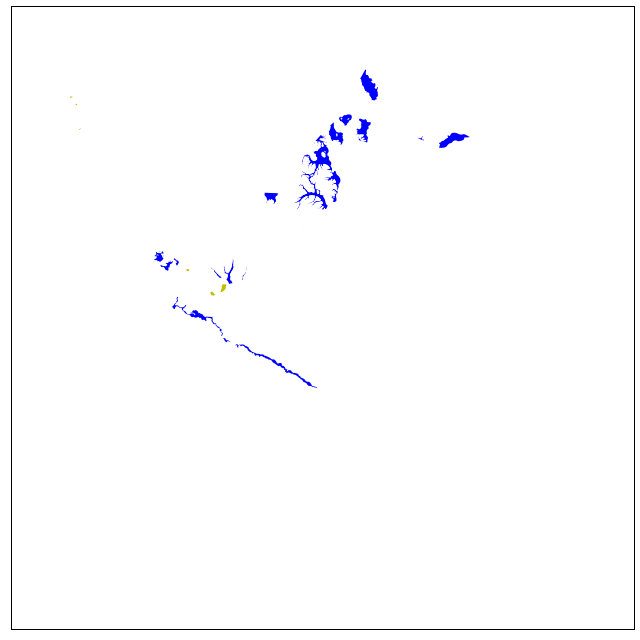

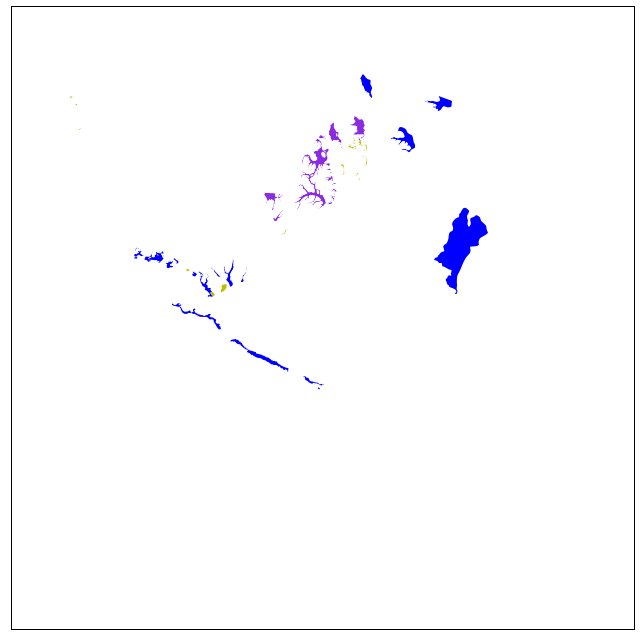

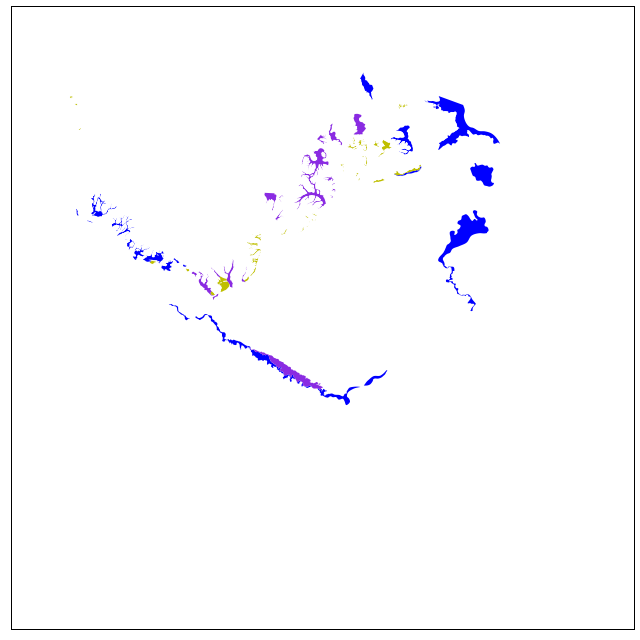

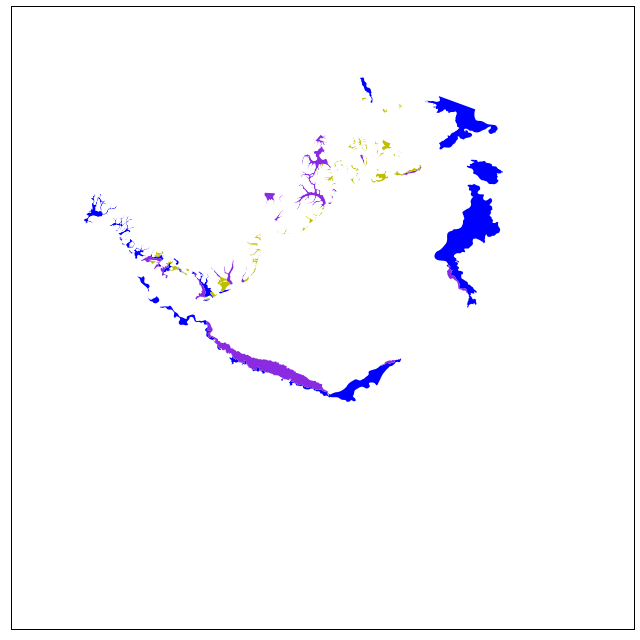

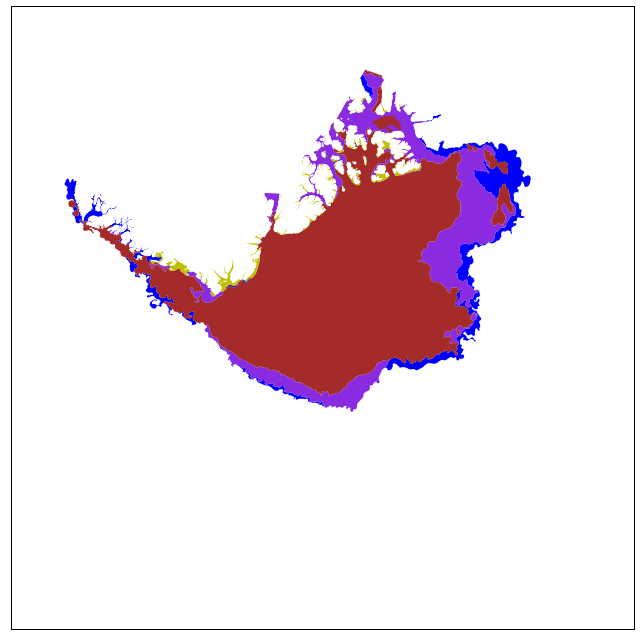

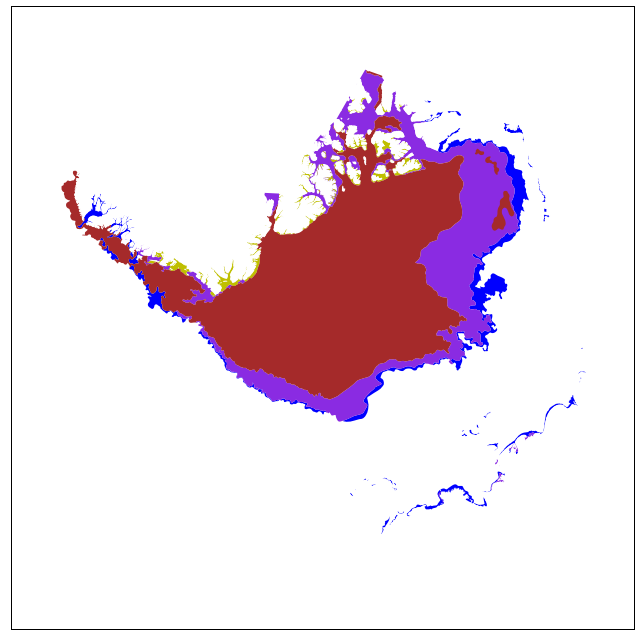

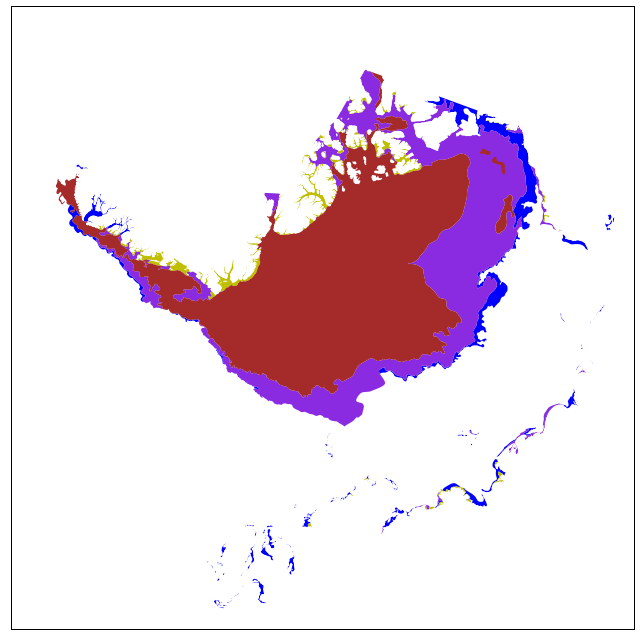

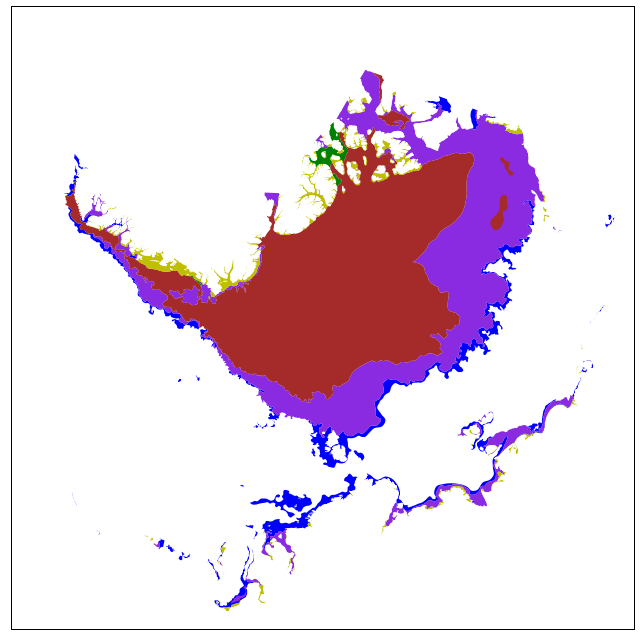

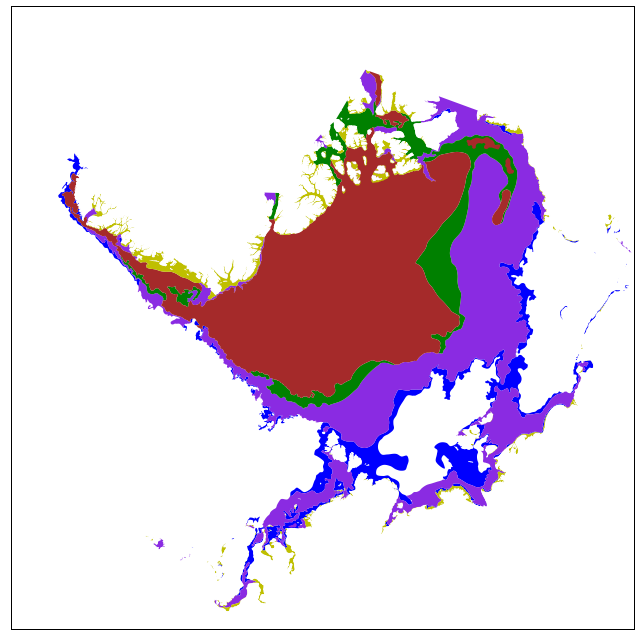

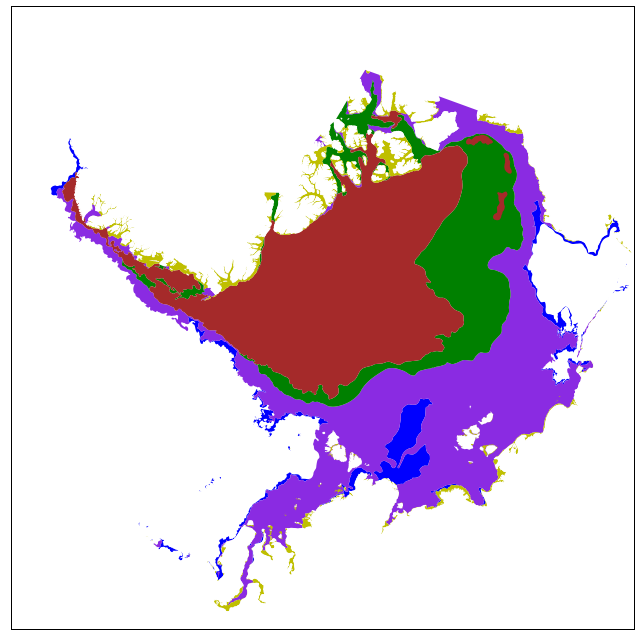

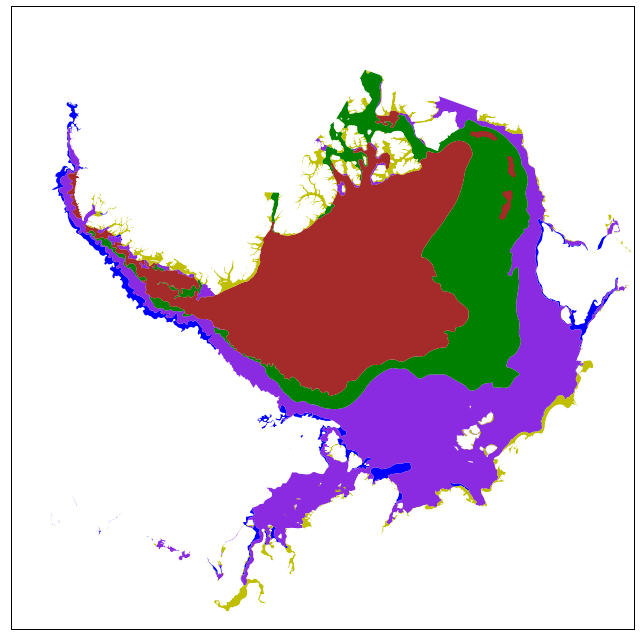

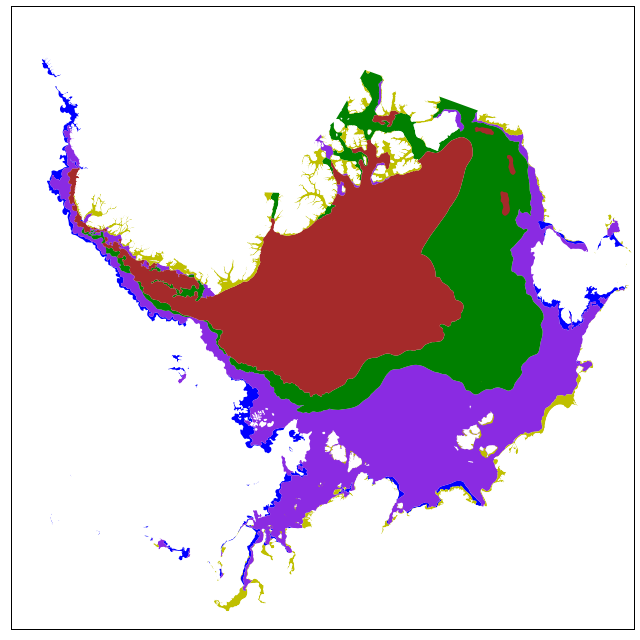

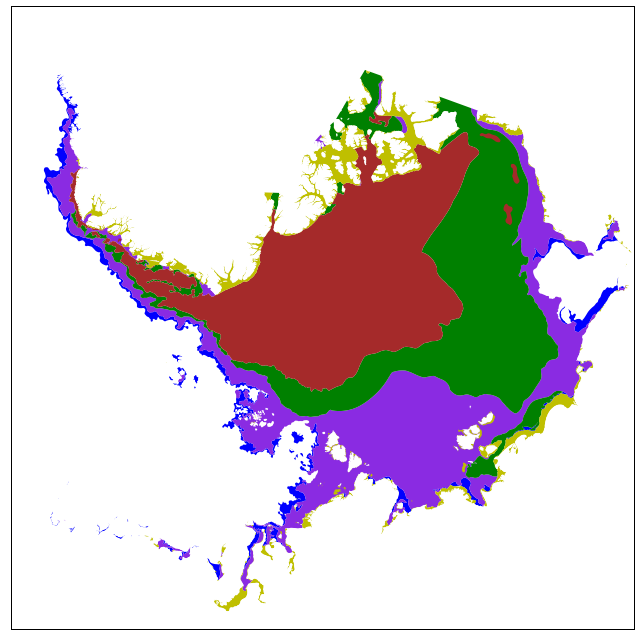

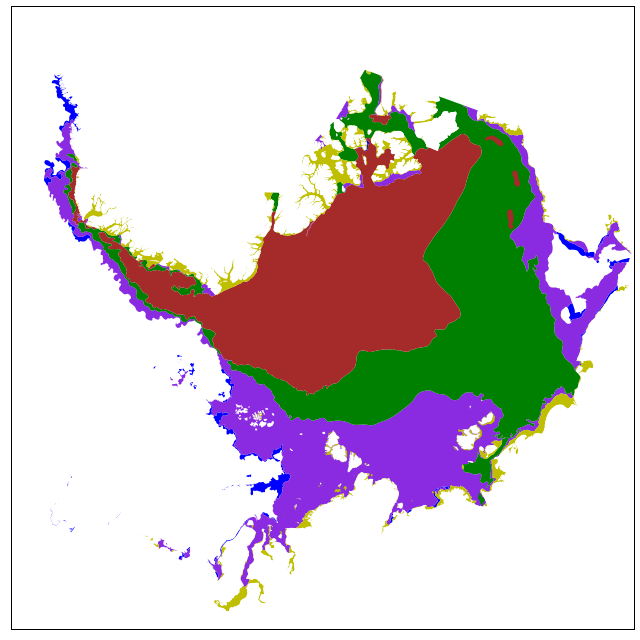

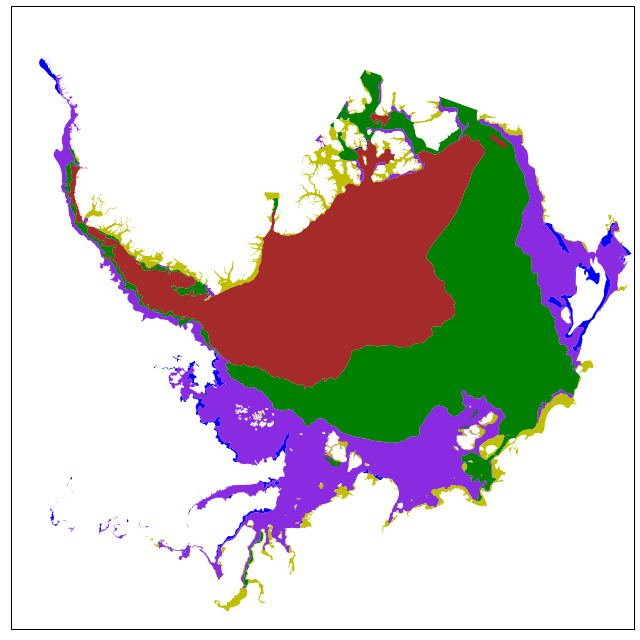

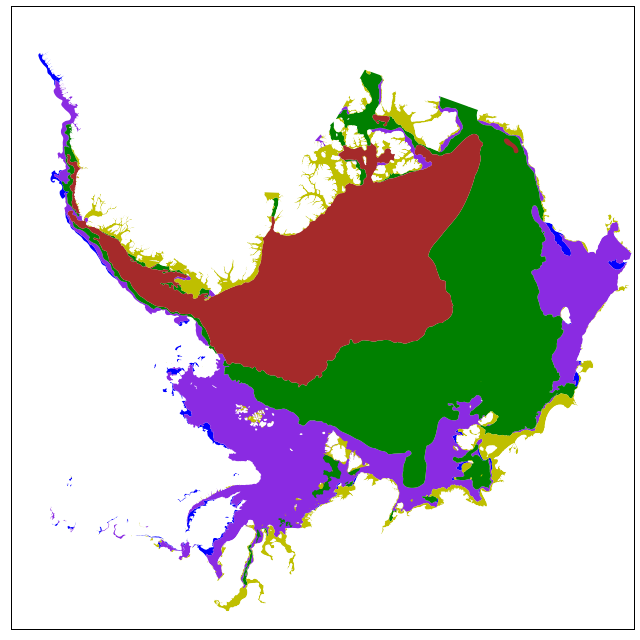

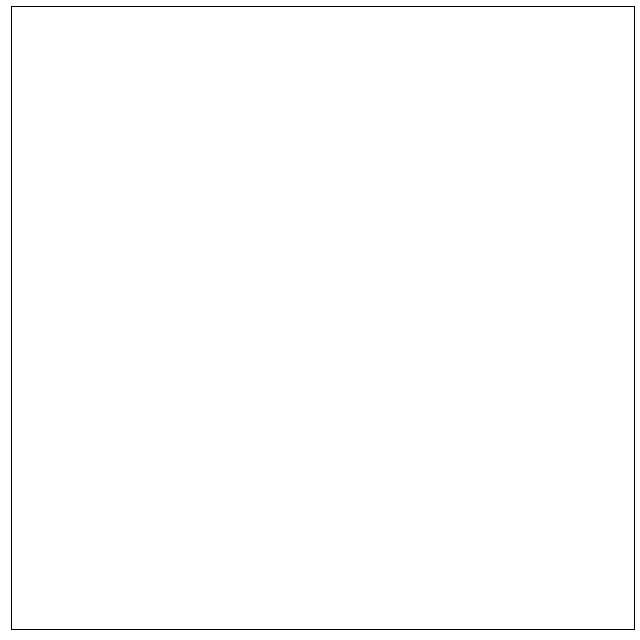

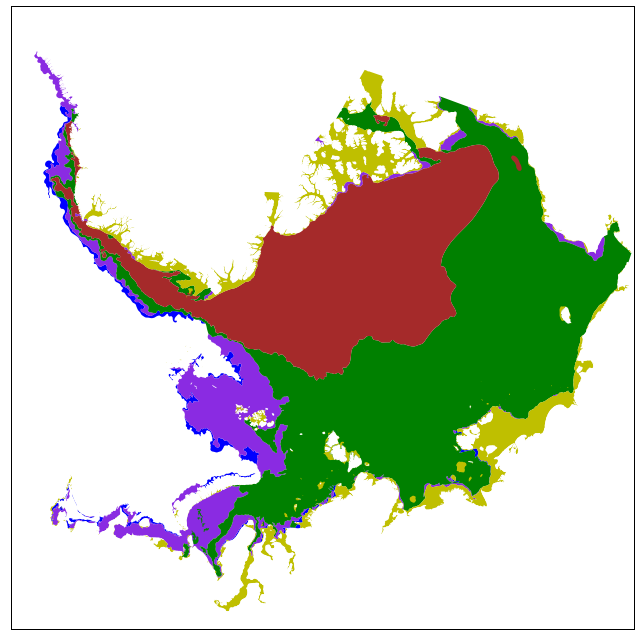

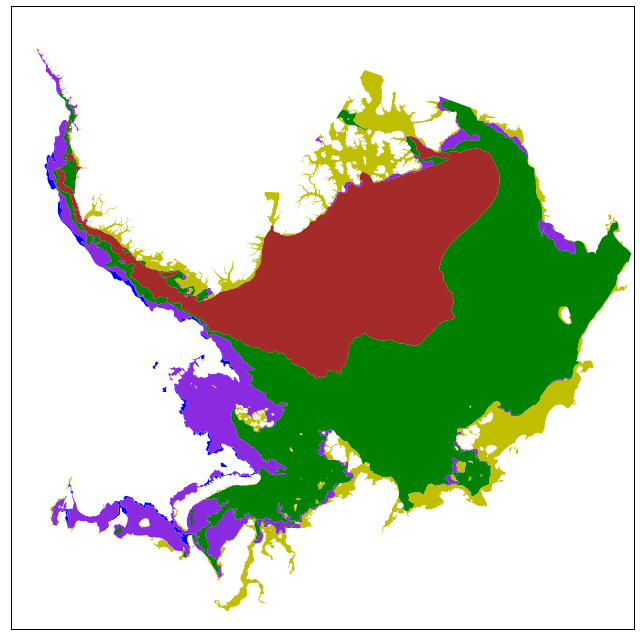

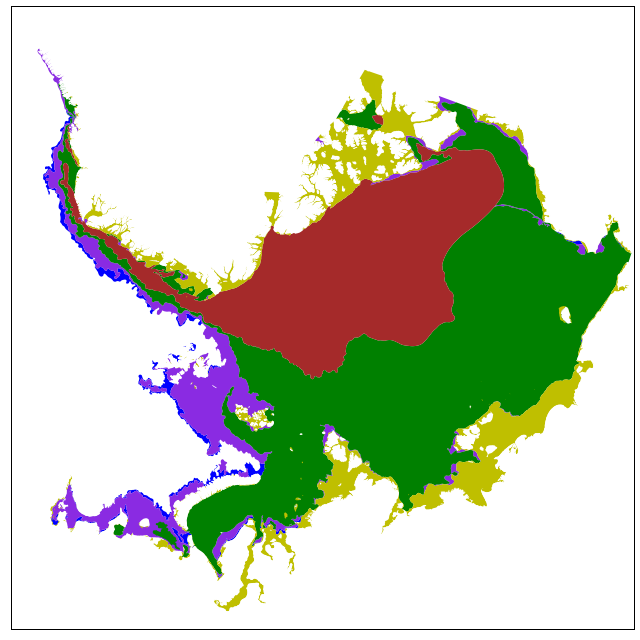

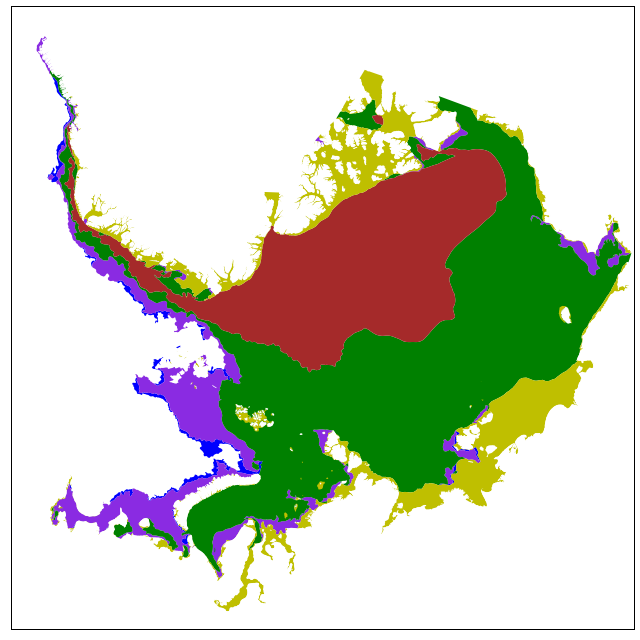

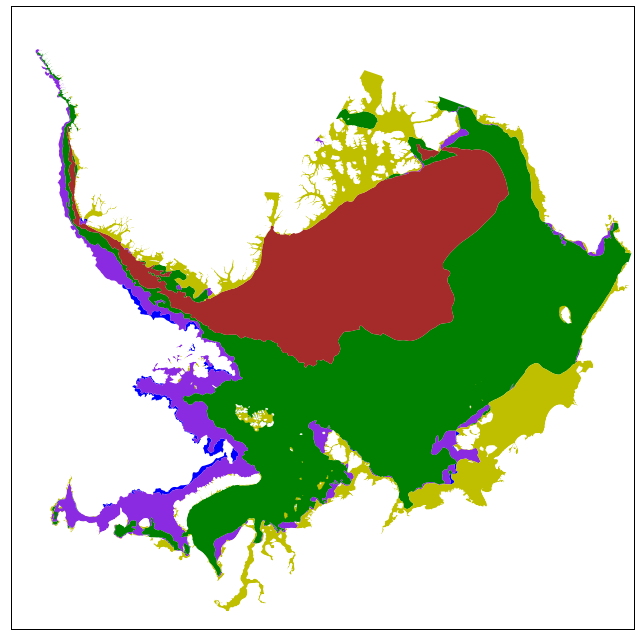

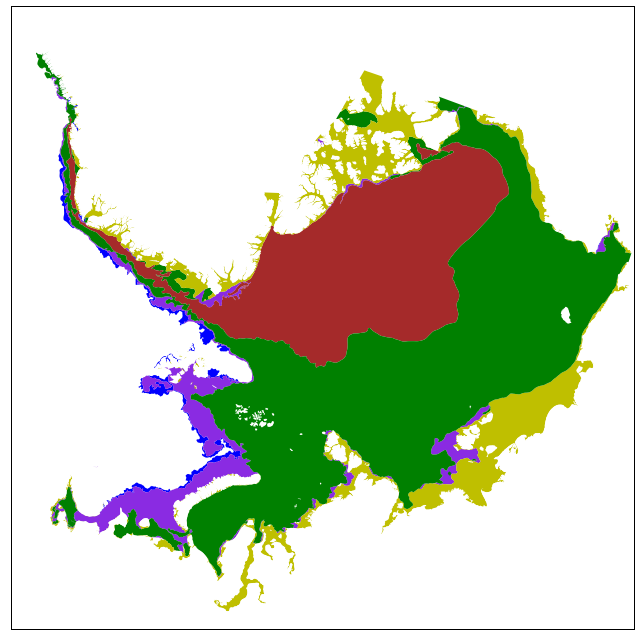

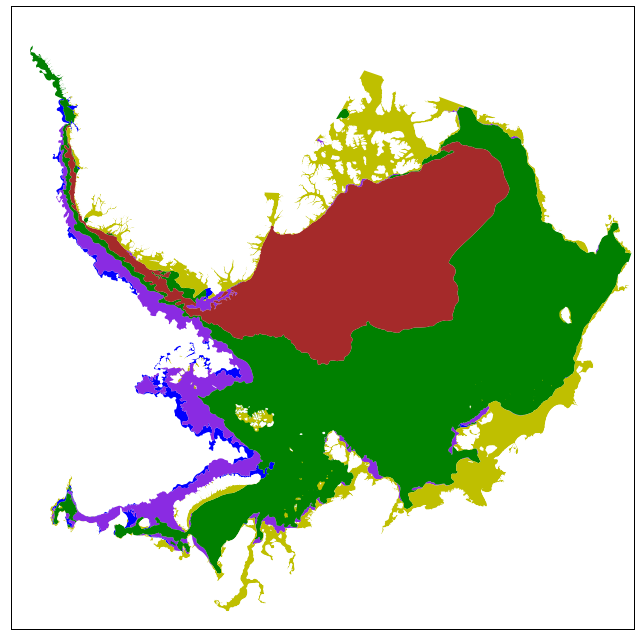

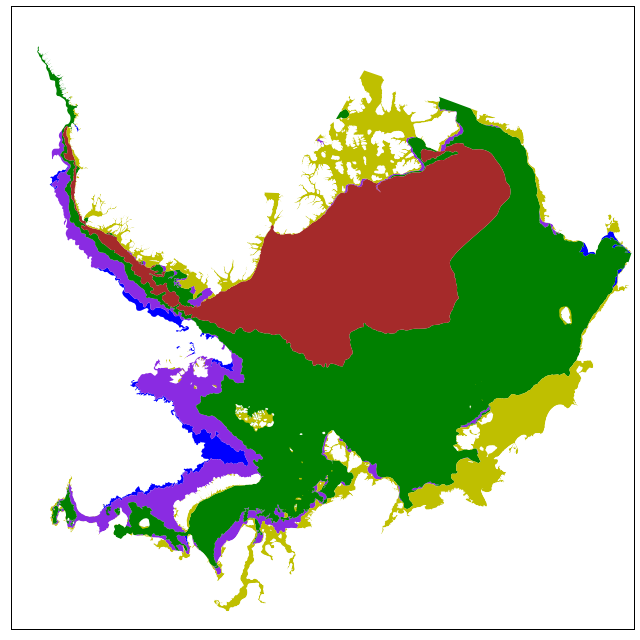

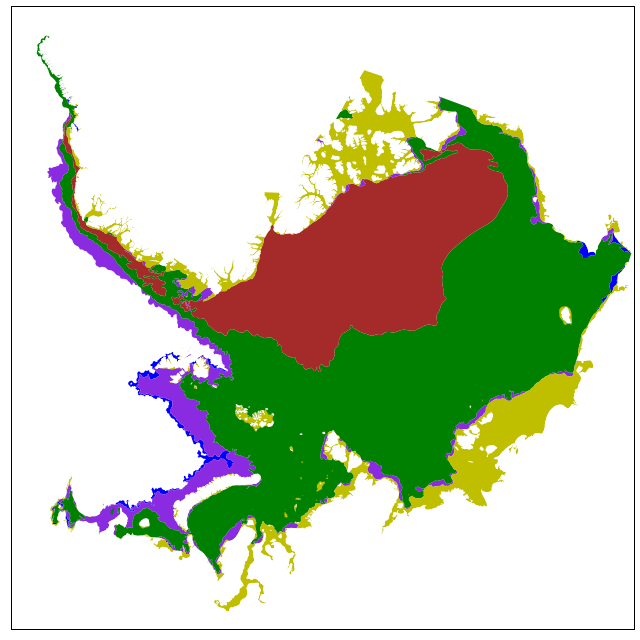

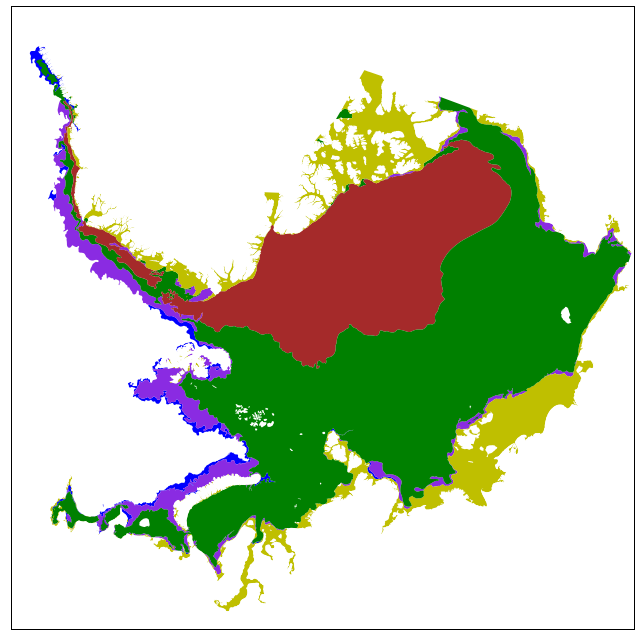

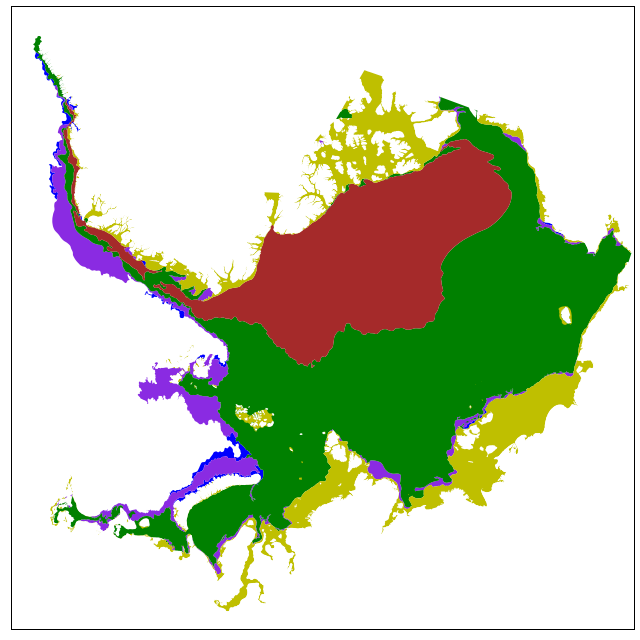

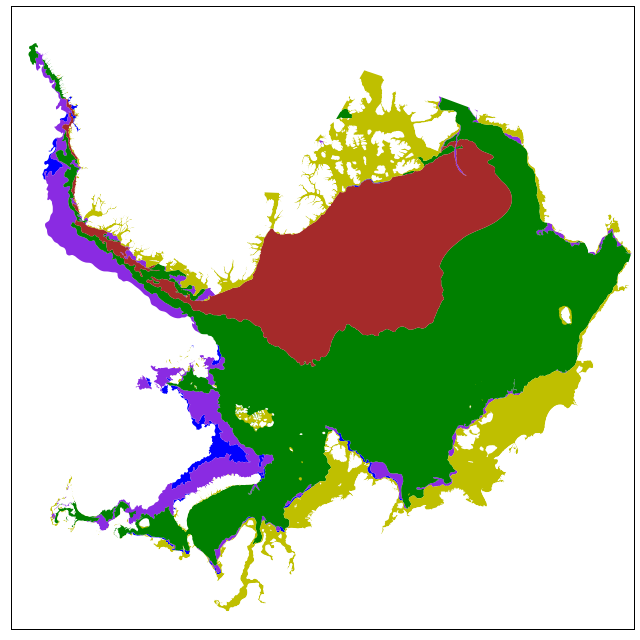

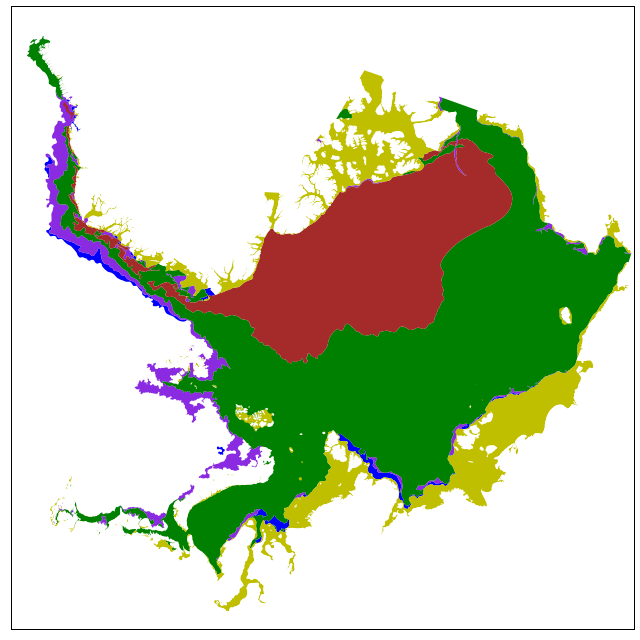

In [76]:
for file in files[86:]:
    file = file.split('.')[0]
    day = file.split('_')[-3]
    try:
        fig = draw_aari_icetype(file,save_path=aari_path + 'pic\\' + str(day) + '.png')
        plot_img_np = get_img_from_fig(fig)
        plot_img_np = add_img_color(plot_img_np)
        plot_img_np = recode_aari_mask(plot_img_np)
        np.save((aari_path + 'npy\\' + str(day) + '.npy'), plot_img_np)
        print(day)
    except ValueError:
        print(day)
        continue


# 投影提取了南北纬信息的shape文件

In [1]:
from dbfread import DBF
import pandas as pd



import matplotlib.pyplot as plt

from HaiYangData import *

In [12]:
def coincident_point_mean(dataframe,value,resolution, grid_array = None,get_count=False):
    if grid_array is None:
        grid_array = np.full((aari.nlat, aari.nlon),fill_value=0)
    for index in dataframe.index:
        x = int(dataframe.projlons[index] / resolution)
        y = int(dataframe.projlats[index] / resolution)
        grid_array[x][y] = dataframe[value][index]
    
    return grid_array

def polar_plot(x_map, y_map,grid, color_lable=None,title=None,cmap = plt.cm.jet):
    plt.figure(figsize=(15,15))
    m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='i')
    m.pcolormesh(x_map, y_map, data=grid, cmap=cmap,latlon = True)
    cb = m.colorbar(location='bottom')
    if color_lable:
        cb.set_label(color_lable)
    m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
    plt.title(title)

def proj_aari_icetype(x_map,y_map,grid,save_path = None):
    fig = plt.figure(figsize=(9, 9))
    fig.set_tight_layout(True)
    m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='i')
    m.pcolormesh(x_map,y_map,grid, cmap=plt.cm.jet,latlon = True)
    m.fillcontinents(color='white')
    if save_path:
        plt.savefig(save_path,dpi=180,bbox_inches='tight',pad_inches = 0, edgecolor = 'white')
#     plt.show()
    plt.close()
    return fig

def recode_aari(grid):
    grid[grid == -9] = 0 # no data
    grid[grid == 0] = 0 # ice free
    grid[grid == 82] = 1 # nilas
    grid[grid == 83] = 2 # young ice
    grid[grid == 86] = 3 # FYI
    grid[grid == 95] = 4 # old ice
    grid[grid == 99] = 5 # fast ice
#     grid[grid == 8] = 1
    
    return grid


def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=180)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
    
def add_img_color(image_arr):
    new_aari_array = np.full(shape=(image_arr.shape[:2]),fill_value=0)
    for i in range(3):
        new_aari_array += image_arr[:,:,i]
    return new_aari_array

def recode_aari_mask(pic):
    pic[pic < 4] = 0
    pic[pic == 764] = 0 # no data
    pic[pic == 502] = 1 # FYI
    pic[pic == 403] = 2 # old ice
    pic[pic == 128] = 3 # fast ice
    pic[pic == 384] = 4 # young ice
    pic[pic>4] = 0
    return pic

In [8]:
save_dir_path = r'E:\python_workfile\sea_ice_classification\data\mask\aari\proj\pic'
files = glob.glob('F:\\remote_sensing_data\\AARI\\' + '*.dbf')

In [9]:
#数据表文件名

resolution = 25000

# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")

transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)


In [21]:
for file in files:
    day = file.split('\\')[-1].split('.')[0]
    try:
        table = DBF(file)

        aari_df = pd.DataFrame(table)

        aari = HaiYangData(satellite='hy', sensor='alt',resolution=resolution)
        aari_x_map,aari_y_map = aari.get_map_grid(transformer_back)

        aari_df["lat"] = aari_df["Field1"]
        aari_df["lon"] = aari_df["Field2"]
        aari.add_proj(aari_df, transformer)
        # 将投影数据添加到dataframe中
        aari_grid = coincident_point_mean(aari_df,'SA',resolution)
        # aari_grid = coincident_point_mean(aari_df,'FA',resolution,grid_array=aari_grid)
        aari_grid = recode_aari(aari_grid)
#         fig = proj_aari_icetype(aari_x_map,aari_y_map,aari_grid,save_path=save_dir_path+'\\'+day+'.png')
    
#         plot_img_np = get_img_from_fig(fig)
#         plot_img_np = add_img_color(plot_img_np)
#         plot_img_np = recode_aari_mask(plot_img_np)
        np.save((r'E:\\python_workfile\\sea_ice_classification\\data\\mask\\aari\\proj\\grid_npy\\'+day+'.npy'), aari_grid)
        print(day)
    
    except ValueError:
        print(day)
        continue

20180102
20180109
20180116
20180123
20180130
20180206
20180213
20180220
20180227
20180306
20180313
20180320
20180327
20180403
20180410
20180417
20180424
20180501
20180515
20180522
20180529
20180605
20180612
20180619
20180626
20180703
20180710
20180717
20180724
20180731
20180807
20180814
20180821
20180828
20180904
20180911
20180918
20180925
20181002
20181009
20181016
20181030
20181106
20181113
20181127
20181204
20181211
20181218
20181225
20181231
20190108
20190115
20190122
20190129
20190205
20190212
20190219
20190226
20190305
20190312
20190319
20190326
20190402
20190409
20190416
20190423
20190430
20190507
20190514
20190521
20190528
20190604
20190611
20190618
20190625
20190702
20190709
20190716
20190723
20190730
20190806
20190813
20190820
20190827
20190903
20190910
20190917
20190924
20191001
20191008
20191015
20191029
20191105
20191112
20191119
20191126
20191203
20191210
20191217
20191224
20191231
20200107
20200114
20200121
20200128
20200204
20200211
20200218
20200225
20200303
20200310
2